# Beta Skeletons

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

## Datos

In [2]:
data = [
    [1, "Axcotla", "Acelotla de Ocampo", "Zempoala", "Hidalgo", "Tzacuala", -98.655546, 19.881269, "INEGI"],
    [2, "Ahuacquatitlan (?)", "Desapareció", "???", "Hidalgo", "Zempoala", -98.6666, 19.8999, "DECM Gazetteer"],
    [3, "Altican", "Santa Maria Aticpac", "Nopaltepec", "Estado de México", "Tlaquilpa", -98.73699717, 19.84496873, "Ricardo kml"],
    [4, "Atlamaac (?)", "Paraje en una barranca", "Epazoyucan", "Hidalgo", "Tlaquilpa", -98.6023, 20.0017, "DECM Gazetteer"],
    [5, "Coatepec", "San José", "Zempoala", "Hidalgo", "Tlaquilpa", -98.774997, 19.964066, "INEGI"],
    [6, "Epasyouac", "Epazoyucan", "Epazoyucan", "Hidalgo", "Cabecera", -98.636209, 20.018022, "INEGI"],
    [7, "Huitepec", "San Pedro Huitepec", "Zapotlán de Juárez", "Hidalgo", "Tzacuala", -98.894724, 20.045782, "INEGI"],
    [8, "Huitznahuac", "Huitznahuac", "Zempoala", "Hidalgo", "Zempoala", -98.708337, 19.960979, "Dra. María"],
    [9, "Ixcoscalla", "San José Palma Gorda", "Mineral de la Reforma", "Hidalgo", None, -98.752439, 20.023868, "INEGI"],
    [10, "Nequemetepec", "Ex-Hacienda Metepec", "Zempoala", "Hidalgo", "Tecipilpan", -98.665379, 19.958328, "INEGI"],
    [11, "Nopalapan", "San Miguel Nopalapa", "Zempoala", "Hidalgo", "Tecipilpan", -98.712549, 20.014718, "INEGI"],
    [12, "Oztotlatlauhca", "Cerro Colorado", "Singuilucan", "Hidalgo", "Epazoyuca", -98.581126, 19.97922, "INEGI"],
    [13, "Oztoyuca", "San Antonio Oxtoyuca", "Zempoala", "Hidalgo", "Epazoyuca", -98.670231, 19.927784, "INEGI"],
    [14, "Pachuca", "Ciudad de Pachuca de Soto", "Pachuca de Soto", "Hidalgo", None, -98.737001, 20.12236, "INEGI"],
    [15, "Quiyahuca (?)", "Desapareció", "???", "Hidalgo", "Zempoala", -98.68798301, 19.90699088, "DECM Gazetteer"],
    [16, "Tecocomolco", "Tecocomolco de Juárez", "Cuautepec de Hinojosa", "Hidalgo", "Tzacuala", -98.352247, 19.905218, "INEGI"],
    [17, "Tecpa", "Hacienda Tepa el Chico", "Zempoala", "Hidalgo", "Zempoala", -98.703999, 19.910731, "INEGI"],
    [18, "Tepa", "Tepa el Grande", "Zempoala", "Hidalgo", "Epazoyuca", -98.606947, 19.859146, "INEGI"],
    [19, "Tepechichilco", "Tepechichilco", "Tlanalapa", "Hidalgo", "Tetliztaca", -98.563298, 19.873123, "INEGI"],
    [20, "Tepemaxalco", "San Juan Tepemaxalco", "Zempoala", "Hidalgo", "Tetliztaca", -98.673995, 19.901625, "INEGI"],
    [21, "Tepeyhaulco", "Tepeyhaulco", "Zempoala", "Hidalgo", None, -98.670806, 19.847068, "INEGI"],
    [22, "Tetliztaca", "Santo Tomás", "Zempoala", "Hidalgo", "Cabecera", -98.567901, 19.902783, "INEGI"],
    [23, "Tetzahuapan", "San Juan Tizahuapan", "Epazoyucan", "Hidalgo", "Tecipilpan", -98.666623, 20.050332, "INEGI"],
    [24, "Tezoacoahuac", "San Nicolás Teocoac", "Singuilucan", "Hidalgo", "Epazoyuca", -98.587929, 20.041027, "INEGI"],
    [25, "Tianguizmanalco (?)", "Desapareció", "???", "Hidalgo", "Tetliztaca", -98.5565, 19.8805, "DECM Gazetteer"],
    [26, "Tilanempax", "Nextlalpan (San Miguel Nextlalpan)", "Zempoala", "Hidalgo", "Tecipilpan", -98.650125, 19.906911, "INEGI"],
    [27, "Tlaquilpa", "San Pedro Tlaquilpan", "Zempoala", "Hidalgo", "Cabecera", -98.752283, 19.943776, "INEGI"],
    [28, "Tochtlauhco", "Ex-Hacienda San Antonio Tochtlacc", "Zempoala", "Hidalgo", "Epazoyuca", -98.57274, 19.91998, "INEGI"],
    [29, "Tzapotla", "San Agustín Zapotla", "Zempoala", "Hidalgo", "Epazoyuca", -98.715496, 19.877271, "INEGI"],
    [30, "Tzapotlan", "Zapotlán de Juárez", "Zapotlán de Juárez", "Hidalgo", "Tecipilpan", -98.861883, 19.974047, "INEGI"],
    [31, "Tzihuacyuca", "San Gabriel Azteca", "Zempoala", "Hidalgo", "Tetliztaca", -98.616917, 19.879346, "INEGI"],
    [32, "Tzontemocatempetel", "Zontecomate", "Zempoala", "Hidalgo", None, -98.59153, 19.966372, "INEGI"],
    [33, "Xalpa", "Jalalipa", "Zempoala", "Hidalgo", None, -98.61992772, 20.01706373, "INEGI"],
    [34, "Xalla", "Ex hacienda San Antonio Xalla", "Zempoala", "Hidalgo", "Epazoyuca", -98.69194676, 19.88524272, "Google maps"],
    [35, "Xochitecuhtla", "Xochitcuehca", "Epazoyucan", "Hidalgo", "San Agustin Tz.", -98.708814, 19.98863, "INEGI"],
    [36, "Zempoala primitiva", "Cerro de los Pitos", "Zempoala", "Hidalgo", "Cabecera", -98.7353, 19.9234, "Mapcarta.com"],
    [37, "Tzacuala primitiva", "Las Palmas (Ejido Zacuala)", "Zempoala", "Hidalgo", "Cabecera", -98.589017, 19.928212, "INEGI Histórico"]
]

columns = ["ID", "Pueblo", "Nombre moderno", "Municipio", "Estado", "Sujeto de", "Longitud", "Latitud", "Fuente de coords."]

df = pd.DataFrame(data, columns=columns)


In [3]:
df

,ID,Pueblo,Nombre moderno,Municipio,Estado,Sujeto de,Longitud,Latitud,Fuente de coords.
0,1,Axcotla,Acelotla de Ocampo,Zempoala,Hidalgo,Tzacuala,-98.655546,19.881269,INEGI
1,2,Ahuacquatitlan (?),Desapareció,???,Hidalgo,Zempoala,-98.666600,19.899900,DECM Gazetteer
2,3,Altican,Santa Maria Aticpac,Nopaltepec,Estado de México,Tlaquilpa,-98.736997,19.844969,Ricardo kml
3,4,Atlamaac (?),Paraje en una barranca,Epazoyucan,Hidalgo,Tlaquilpa,-98.602300,20.001700,DECM Gazetteer
4,5,Coatepec,San José,Zempoala,Hidalgo,Tlaquilpa,-98.774997,19.964066,INEGI
5,6,Epasyouac,Epazoyucan,Epazoyucan,Hidalgo,Cabecera,-98.636209,20.018022,INEGI
6,7,Huitepec,San Pedro Huitepec,Zapotlán de Juárez,Hidalgo,Tzacuala,-98.894724,20.045782,INEGI
7,8,Huitznahuac,Huitznahuac,Zempoala,Hidalgo,Zempoala,-98.708337,19.960979,Dra. María
8,9,Ixcoscalla,San José Palma Gorda,Mineral de la Reforma,Hidalgo,None,-98.752439,20.023868,INEGI
9,10,Nequemetepec,Ex-Hacienda Metepec,Zempoala,Hidalgo,Tecipilpan,-98.665379,19.958328,INEGI


In [4]:
# Guardar como archivo CSV
df.to_csv("./../data/pueblos_beta_skeleton.csv", index=False)

## STEP 1: Coordinates from DataFrame

In [5]:
coords = df[["Longitud", "Latitud"]].values
names = df["Pueblo"].values

In [6]:
import matplotlib.pyplot as plt

def plot_points(coords, names):
    plt.figure(figsize=(10, 10))
    plt.scatter(coords[:, 0], coords[:, 1], color='blue', s=50)

    # Etiquetar cada punto con su nombre
    for i, (x, y) in enumerate(coords):
        plt.text(x + 0.0003, y + 0.0003, names[i], fontsize=8)

    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.title("Pueblos: solo puntos")
    plt.axis("equal")
    plt.grid(True)
    plt.show()


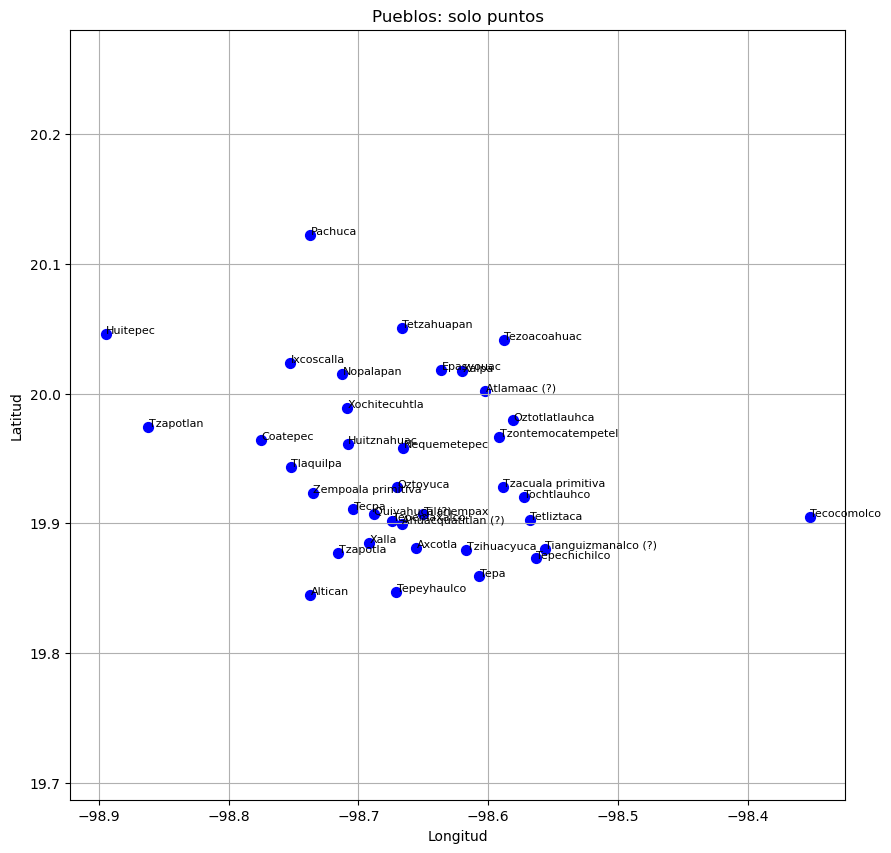

In [7]:
plot_points(coords, names)

## STEP 2: Function to build beta-skeleton

### For pair 6 and 13

In [8]:
import numpy as np

# Extraer las coordenadas de los puntos
p1 = coords[6]
p2 = coords[13]

# Calcular la distancia euclidiana
d = np.linalg.norm(p1 - p2)
print(f"Distancia entre '{names[6]}' y '{names[13]}': {d:.6f}")


Distancia entre 'Huitepec' y 'Pachuca': 0.175330


In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

def plot_beta_tangent_circles(coords, names, i=7, j=13, beta=1.0):
    p1 = coords[i]
    p2 = coords[j]
    d = np.linalg.norm(p2 - p1)

    if beta < 1:
        raise ValueError("Beta debe ser ≥ 1 para una construcción válida.")

    r = (beta * d) / 2
    direction = (p2 - p1) / d

    center1 = p1 + direction * r
    center2 = p2 - direction * r

    fig, ax = plt.subplots(figsize=(10, 10))

    # Determinar qué puntos están dentro de los círculos
    in_lune = []
    out_lune = []
    for k, pk in enumerate(coords):
        if k in (i, j):
            continue  # No analizar los dos puntos principales
        dist1 = np.linalg.norm(pk - center1)
        dist2 = np.linalg.norm(pk - center2)
        if dist1 < r or dist2 < r:
            in_lune.append((pk, names[k]))
        else:
            out_lune.append((pk, names[k]))

    # Graficar puntos fuera de la luna
    if out_lune:
        x_out, y_out = zip(*[p for p, _ in out_lune])
        ax.scatter(x_out, y_out, color='lightgray', label='Otros pueblos fuera de la luna')
    
    # Graficar puntos dentro de la luna
    if in_lune:
        x_in, y_in = zip(*[p for p, _ in in_lune])
        ax.scatter(x_in, y_in, color='blue', label='Pueblos dentro de la luna')

    # Graficar los puntos evaluados
    ax.scatter([p1[0], p2[0]], [p1[1], p2[1]], color='red', label='Puntos evaluados', zorder=3)

    # Etiquetas
    ax.text(p1[0] + 0.0003, p1[1] + 0.0003, names[i], fontsize=9)
    ax.text(p2[0] + 0.0003, p2[1] + 0.0003, names[j], fontsize=9)

    # Círculos
    ax.add_patch(Circle(center1, r, color='blue', fill=False, linestyle='--', label=f"Círculo tangente a {names[i]}"))
    ax.add_patch(Circle(center2, r, color='green', fill=False, linestyle='--', label=f"Círculo tangente a {names[j]}"))

    # Línea entre puntos evaluados
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k--', alpha=0.5)

    ax.set_xlabel("Longitud")
    ax.set_ylabel("Latitud")
    ax.set_title(f"Círculos β = {beta} tangentes a '{names[i]}' y '{names[j]}'")
    ax.axis("equal")
    ax.grid(True)
    ax.legend()
    plt.show()


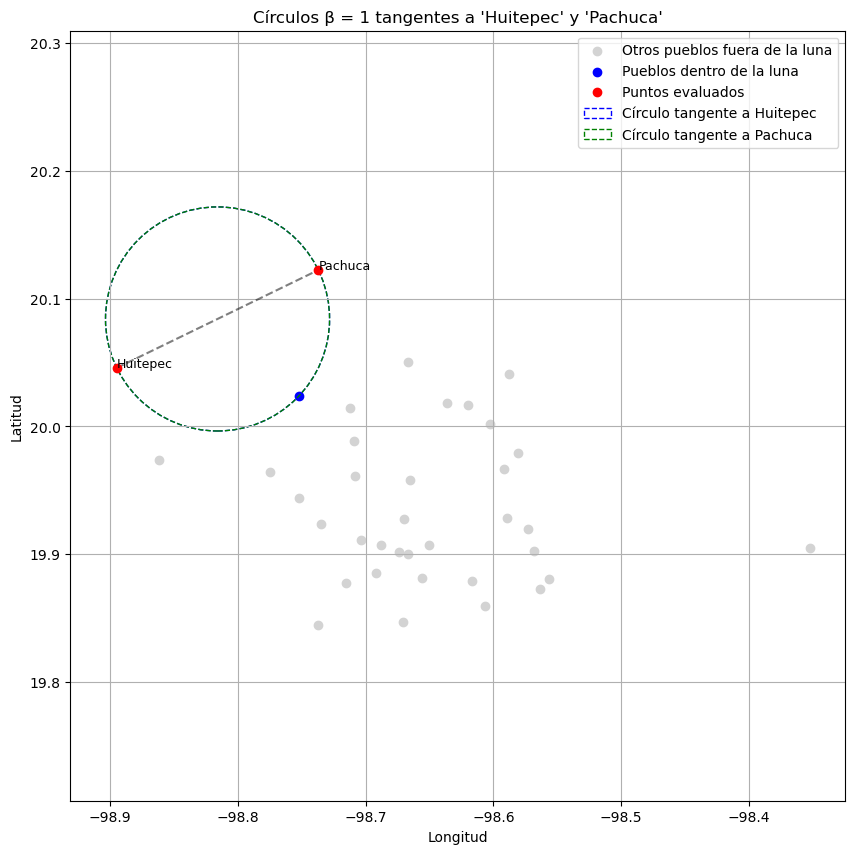

In [10]:
plot_beta_tangent_circles(coords, names, i=6, j=13, beta=1)

### For node 6

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

def plot_beta_lunes_for_node(coords, names, i, beta=1.0):
    n = len(coords)
    p1 = coords[i]

    for j in range(n):
        if j == i:
            continue

        p2 = coords[j]
        d = np.linalg.norm(p2 - p1)
        if d == 0:
            continue

        r = (beta * d) / 2
        direction = (p2 - p1) / d
        center1 = p1 + direction * r
        center2 = p2 - direction * r

        # Clasificar puntos dentro y fuera de la luna
        in_lune = []
        out_lune = []
        for k, pk in enumerate(coords):
            if k in (i, j):
                continue
            dist1 = np.linalg.norm(pk - center1)
            dist2 = np.linalg.norm(pk - center2)
            if dist1 < r or dist2 < r:
                in_lune.append((pk, names[k]))
            else:
                out_lune.append((pk, names[k]))

        # Graficar
        fig, ax = plt.subplots(figsize=(8, 8))

        if out_lune:
            x_out, y_out = zip(*[p for p, _ in out_lune])
            ax.scatter(x_out, y_out, color='lightgray', label='Otros pueblos fuera de la luna')

        if in_lune:
            x_in, y_in = zip(*[p for p, _ in in_lune])
            ax.scatter(x_in, y_in, color='blue', label='Pueblos dentro de la luna')

        ax.scatter([p1[0], p2[0]], [p1[1], p2[1]], color='red', zorder=3)

        # Etiquetas
        ax.text(p1[0] + 0.0003, p1[1] + 0.0003, names[i], fontsize=9)
        ax.text(p2[0] + 0.0003, p2[1] + 0.0003, names[j], fontsize=9)

        # Círculos tangentes
        circle1 = Circle(center1, r, color='blue', fill=False, linestyle='--', label=f"Tangente a {names[i]}")
        circle2 = Circle(center2, r, color='green', fill=False, linestyle='--', label=f"Tangente a {names[j]}")
        ax.add_patch(circle1)
        ax.add_patch(circle2)

        # Línea entre los puntos evaluados
        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k--', alpha=0.5)

        ax.set_xlabel("Longitud")
        ax.set_ylabel("Latitud")
        ax.set_title(f"Luna β = {beta} entre '{names[i]}' y '{names[j]}'")
        ax.axis("equal")
        ax.grid(True)
        ax.legend()
        plt.show()


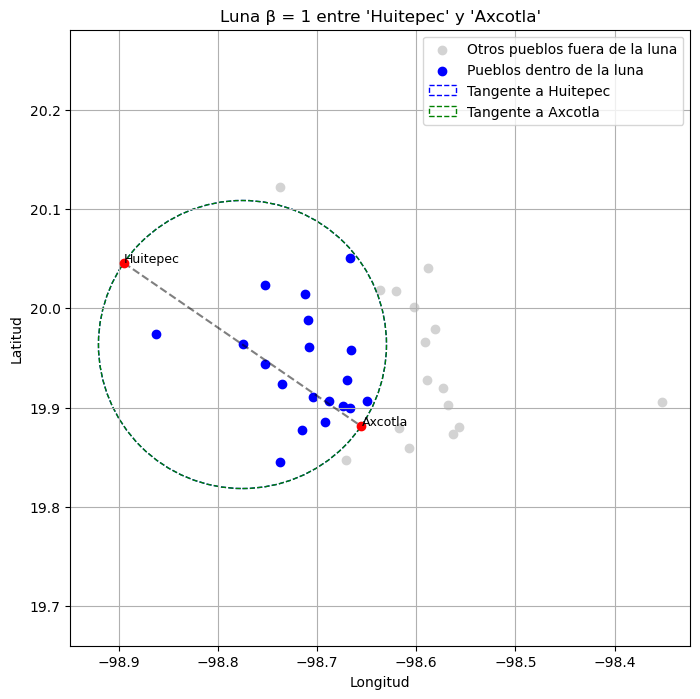

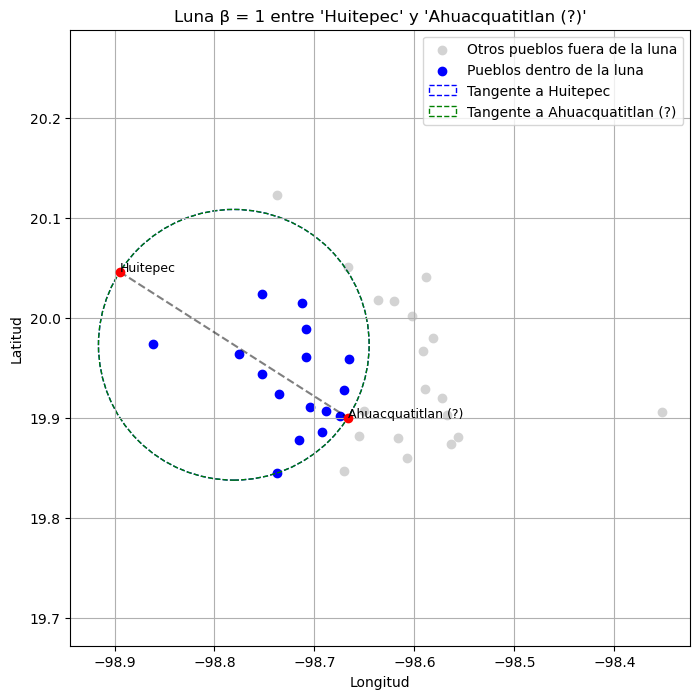

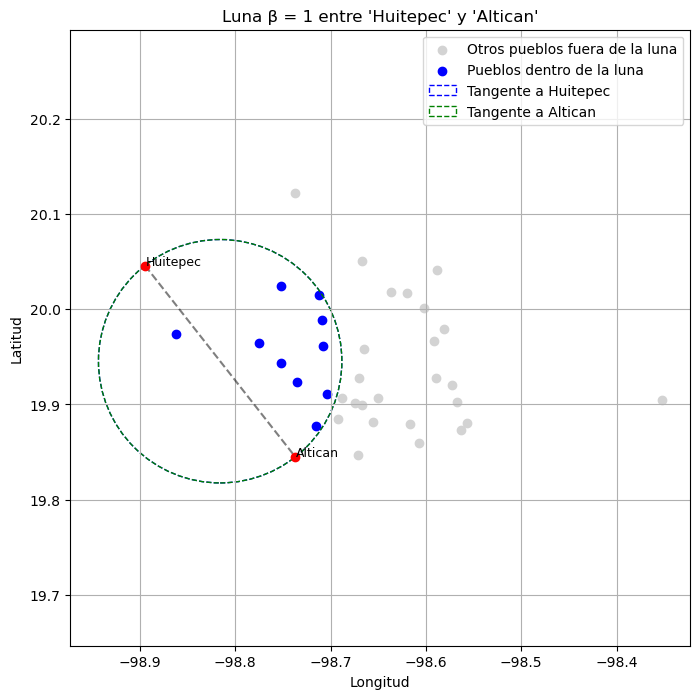

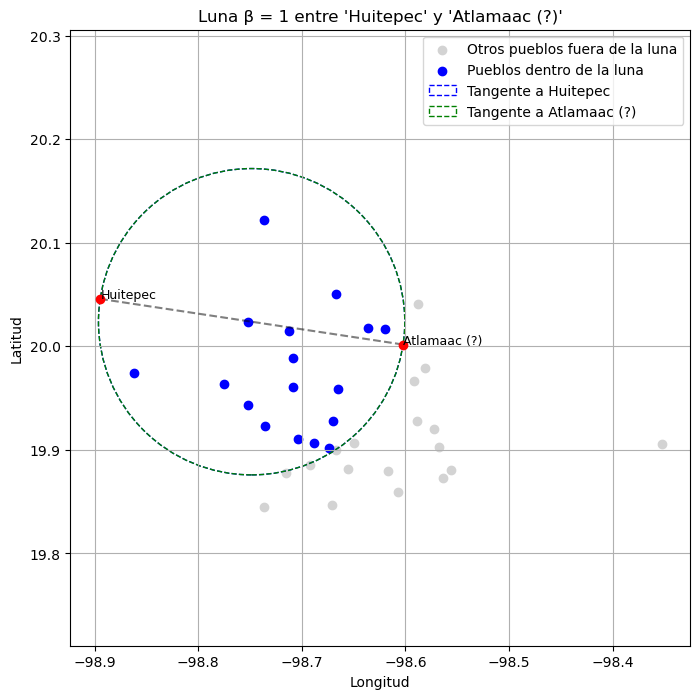

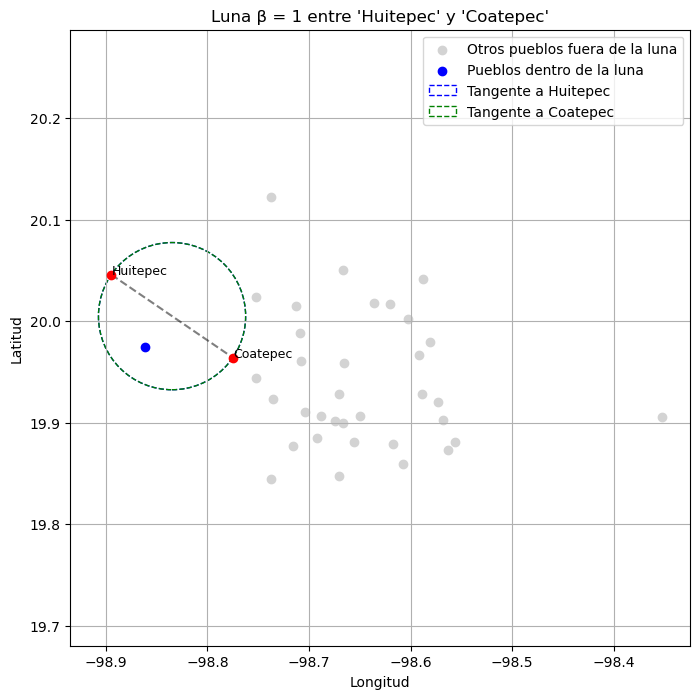

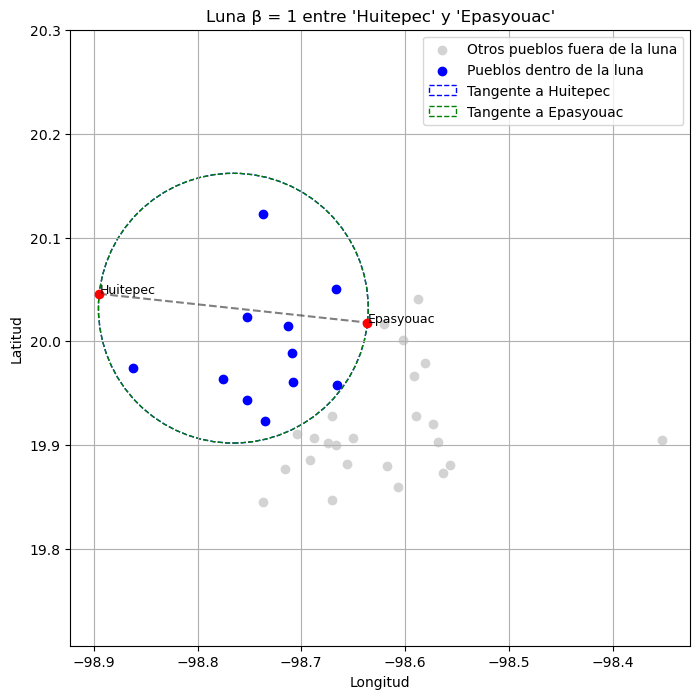

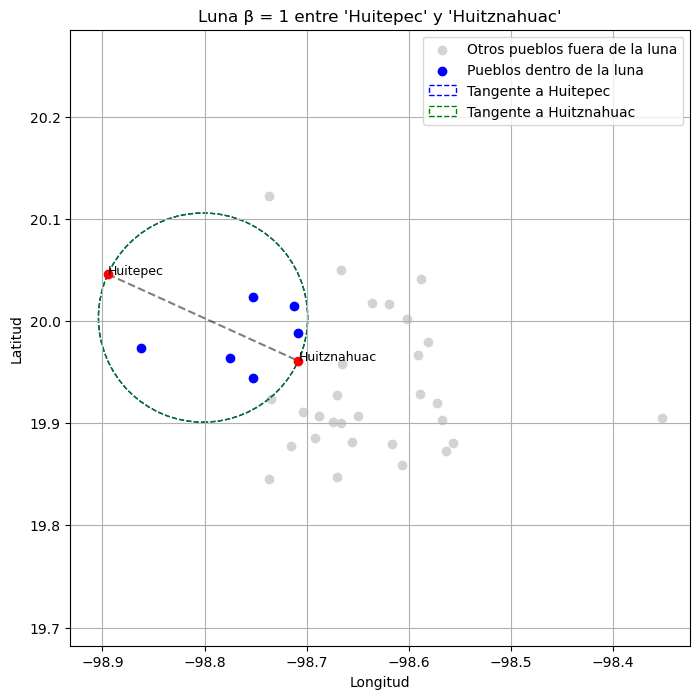

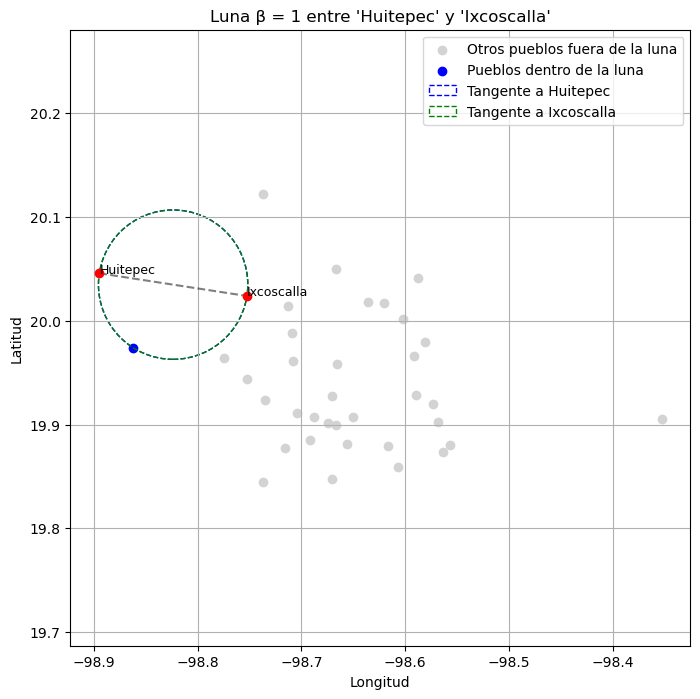

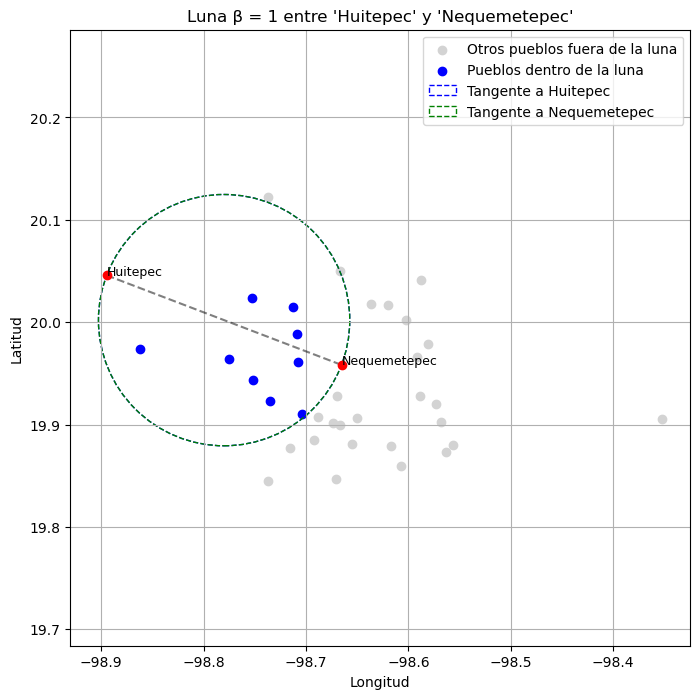

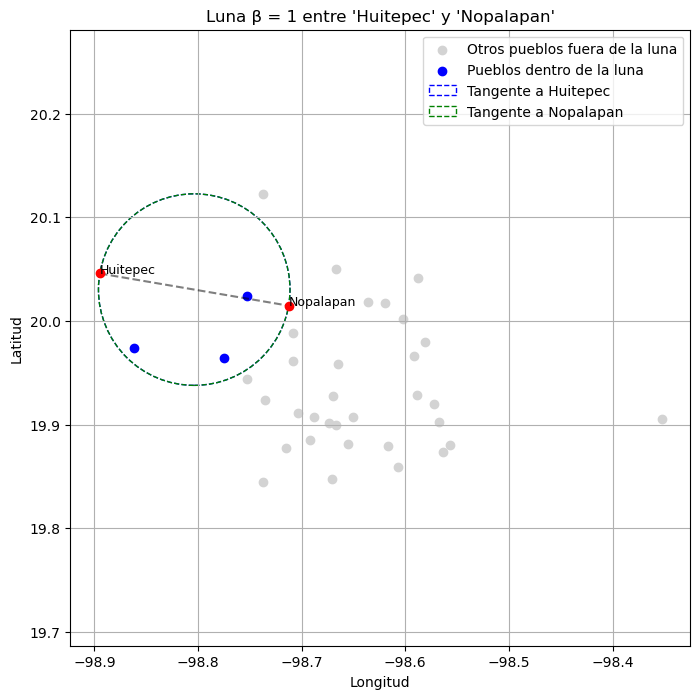

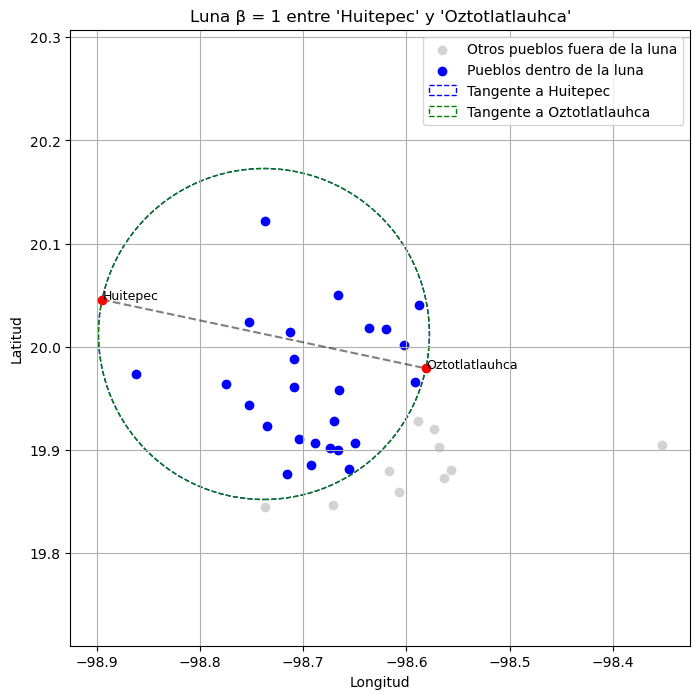

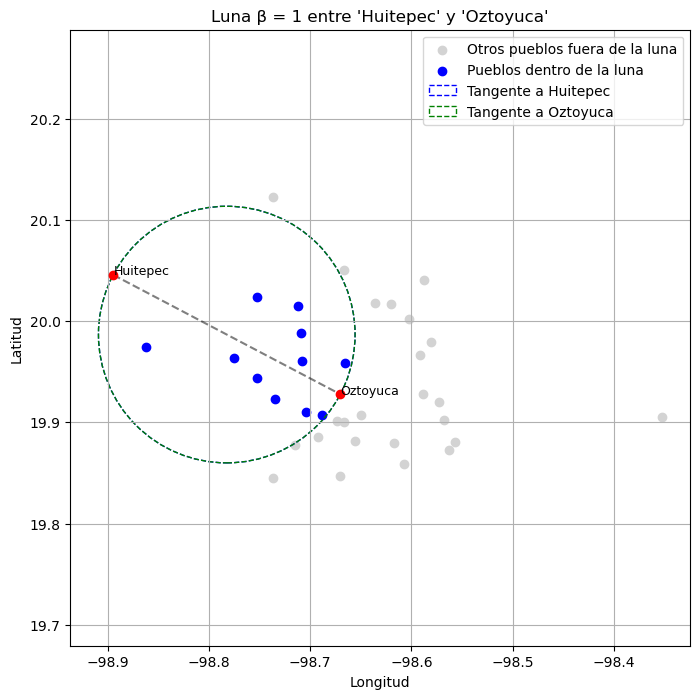

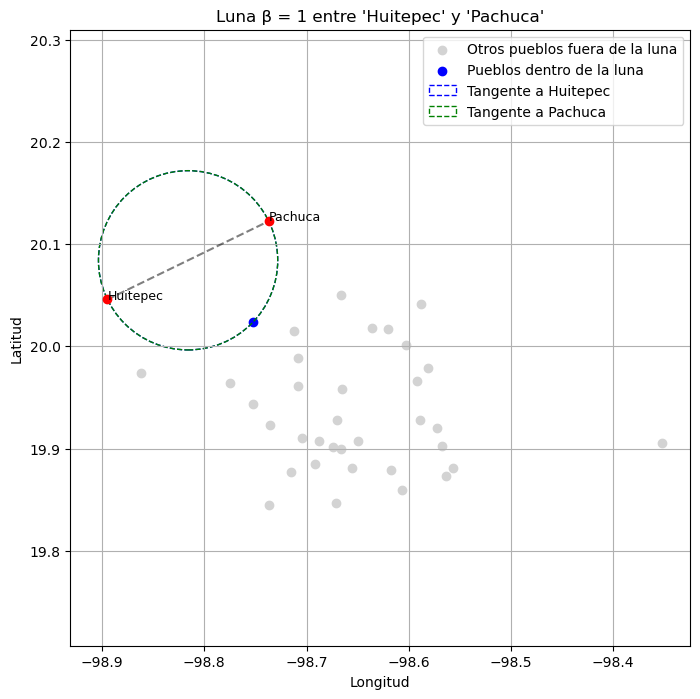

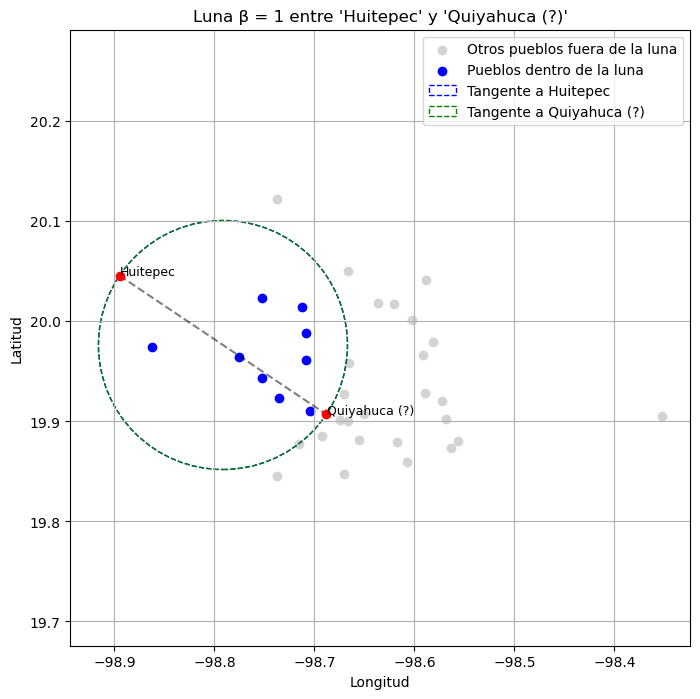

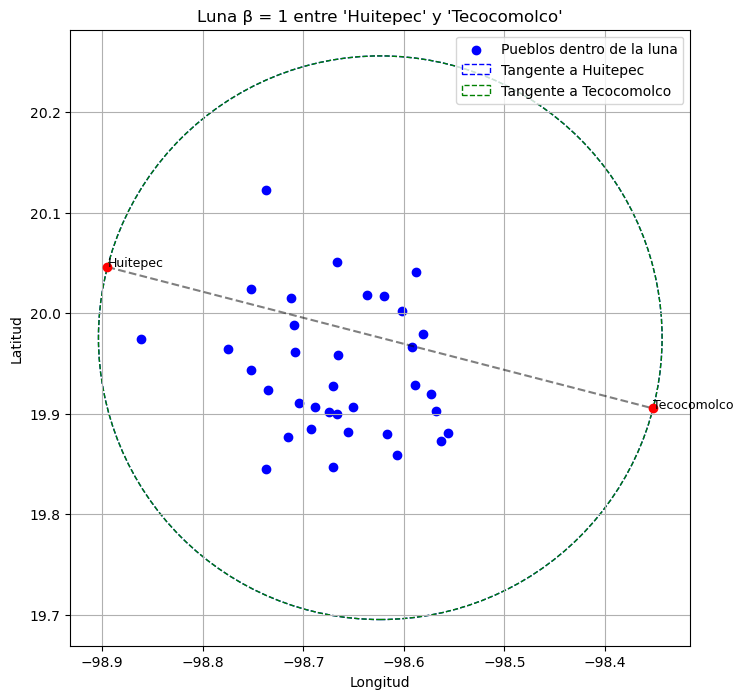

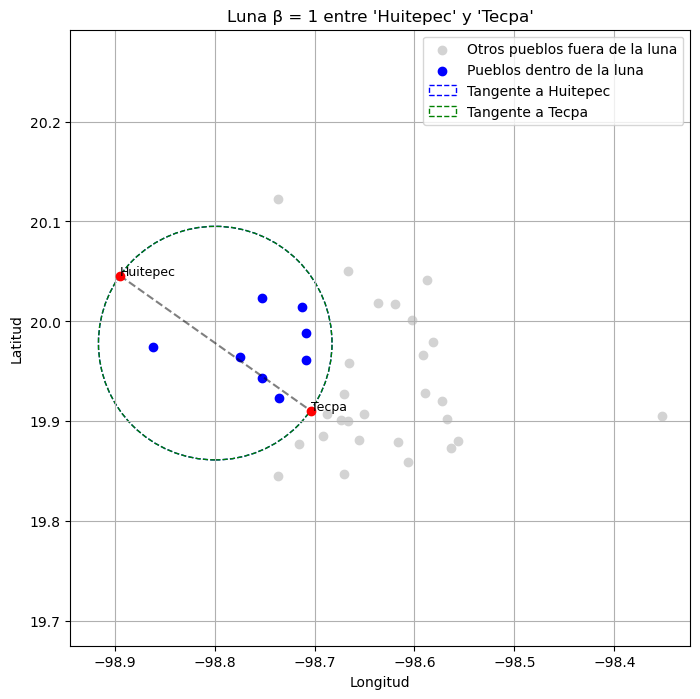

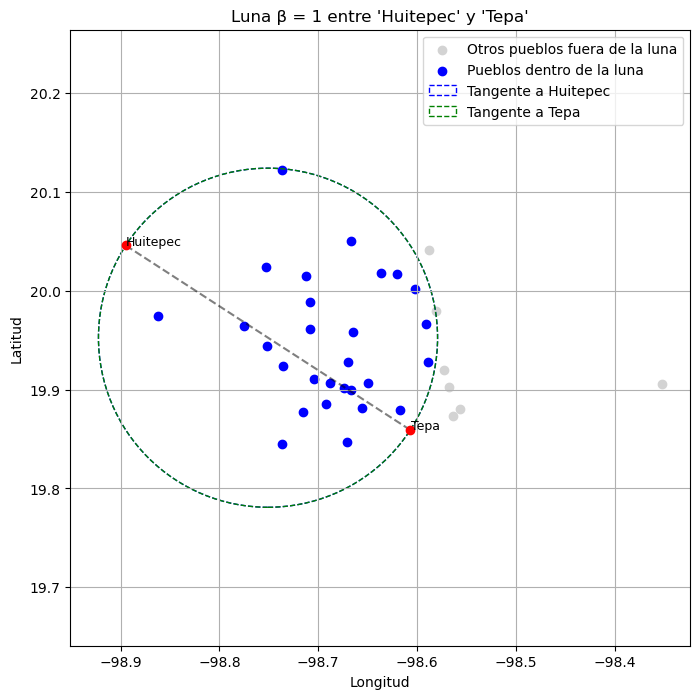

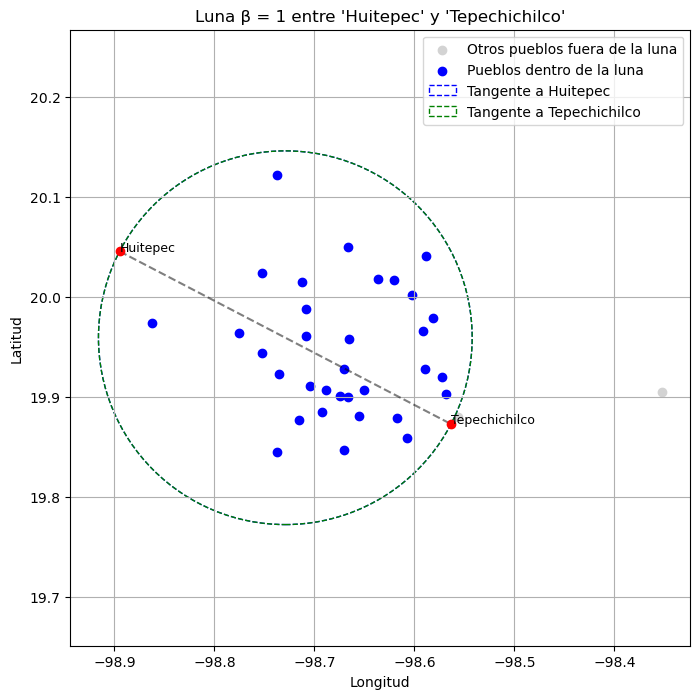

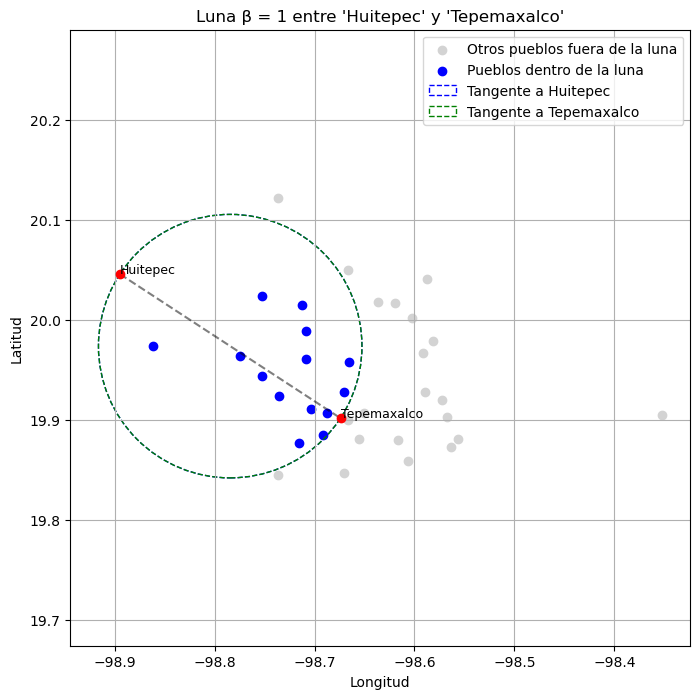

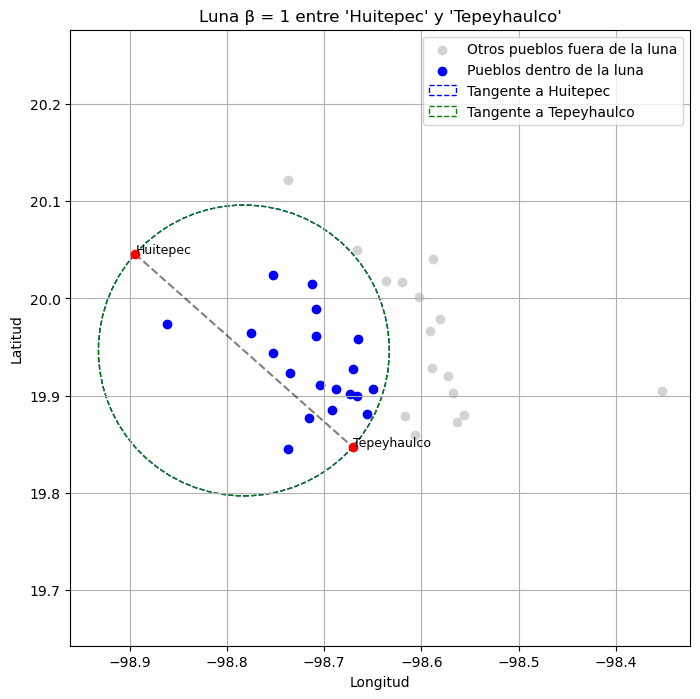

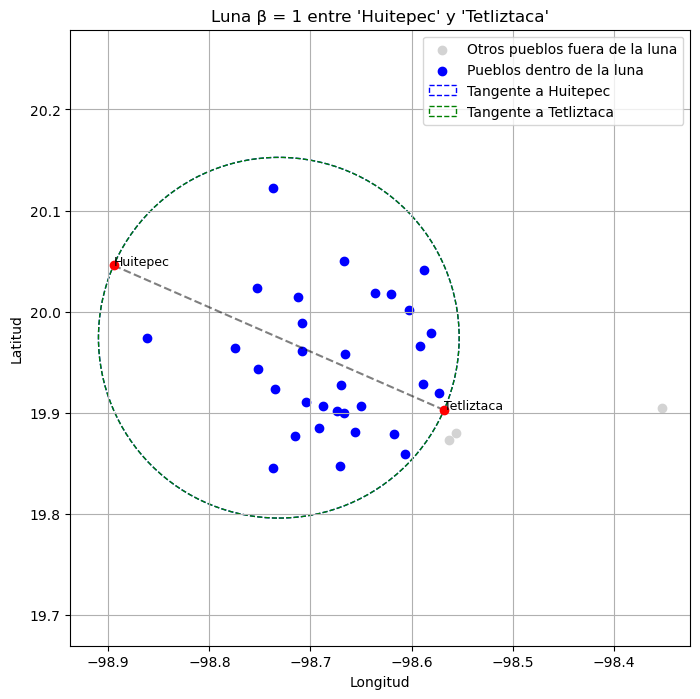

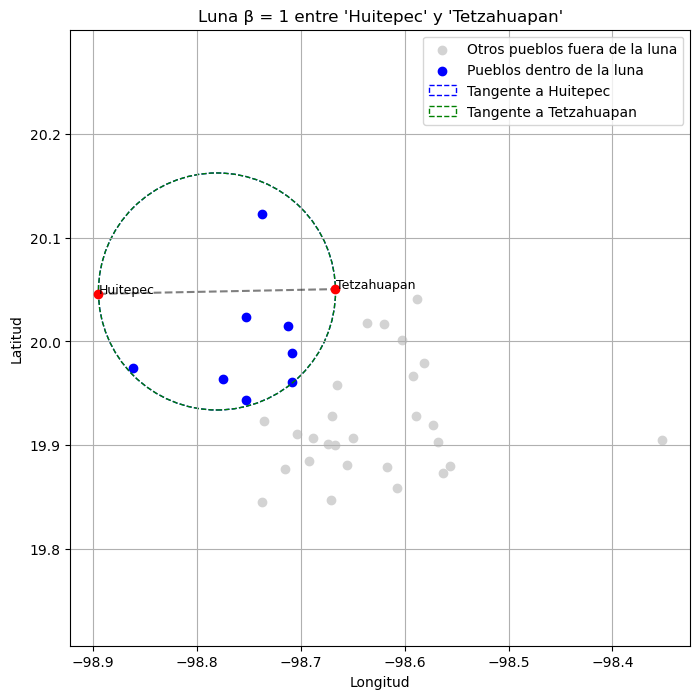

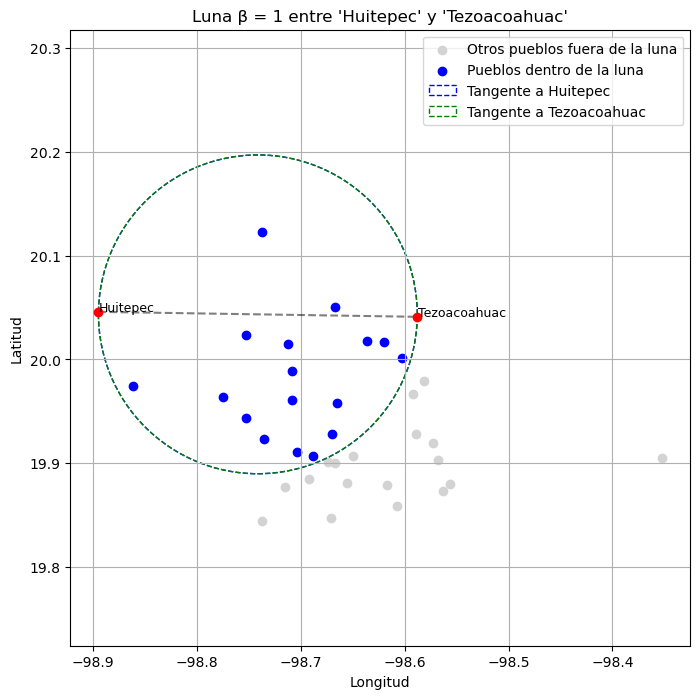

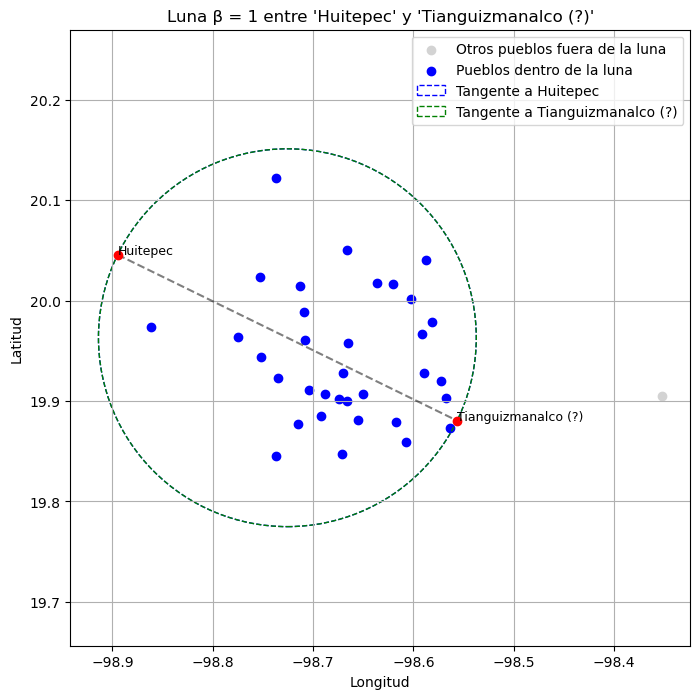

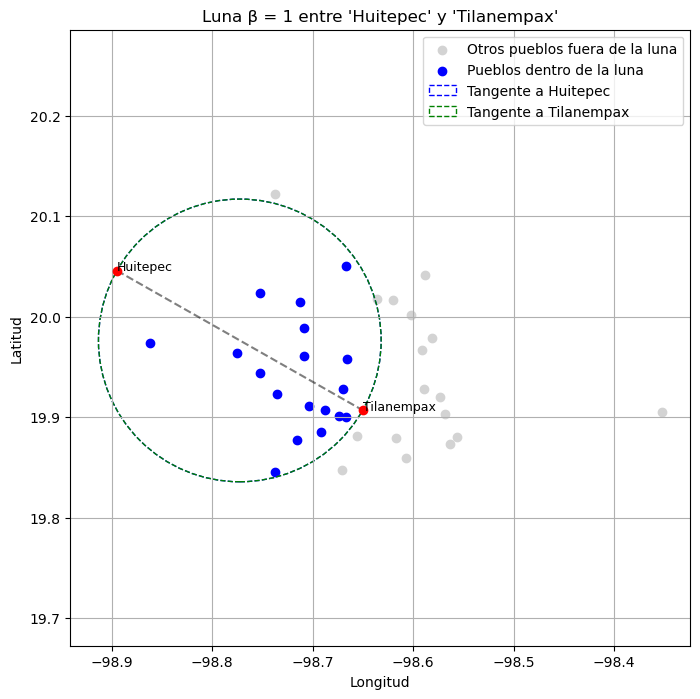

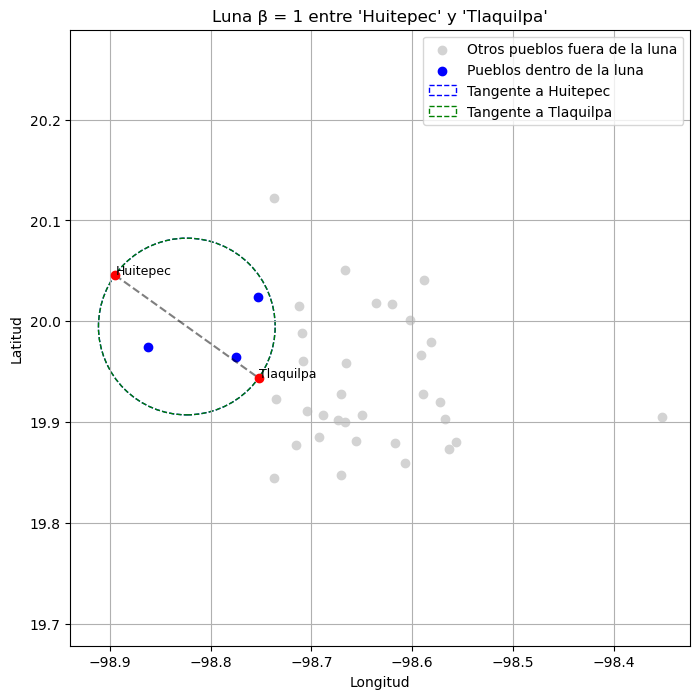

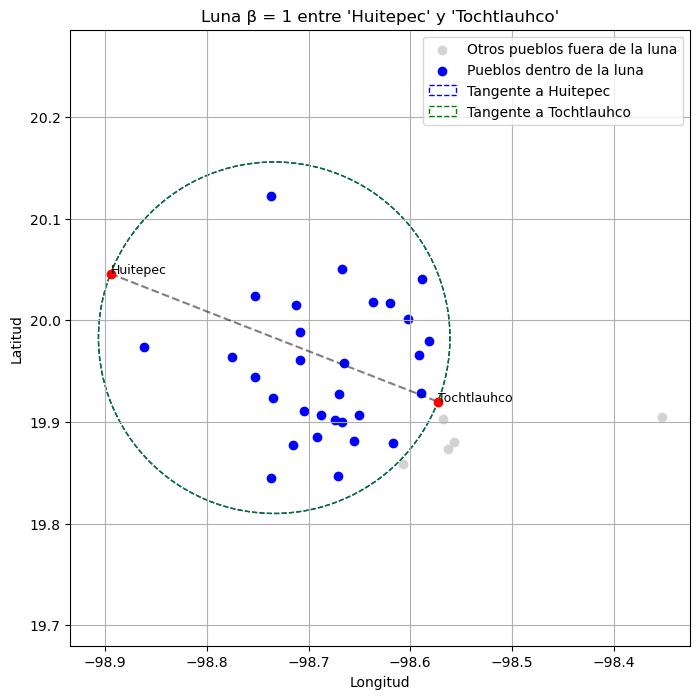

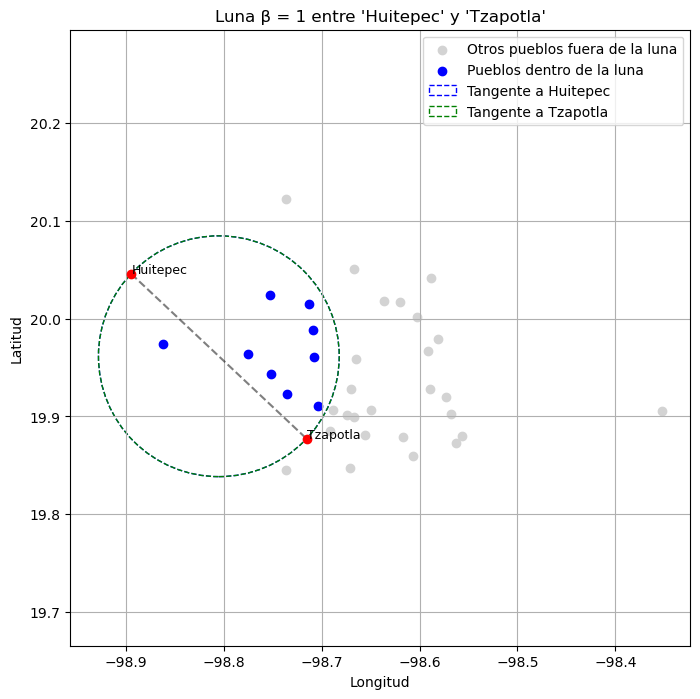

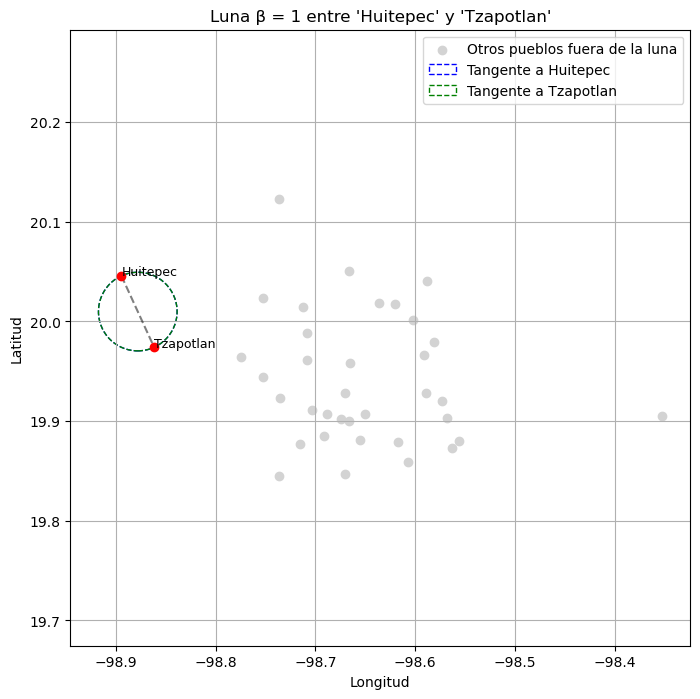

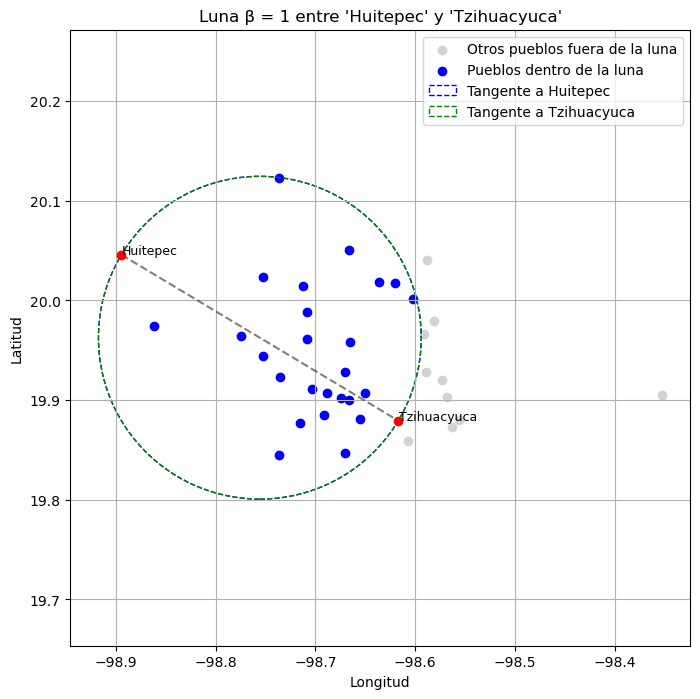

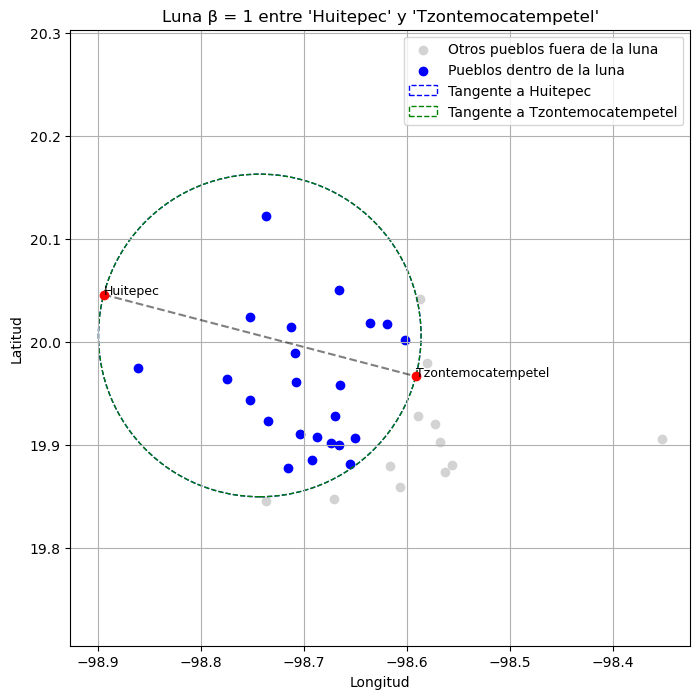

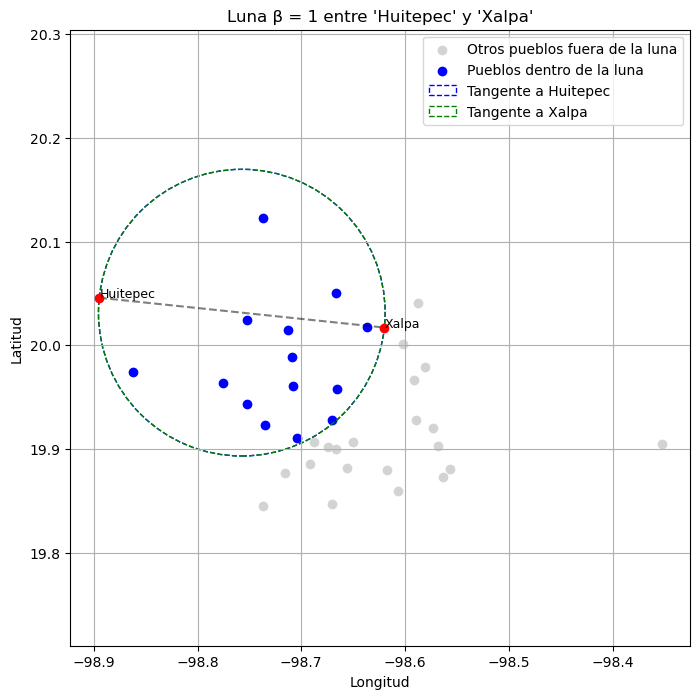

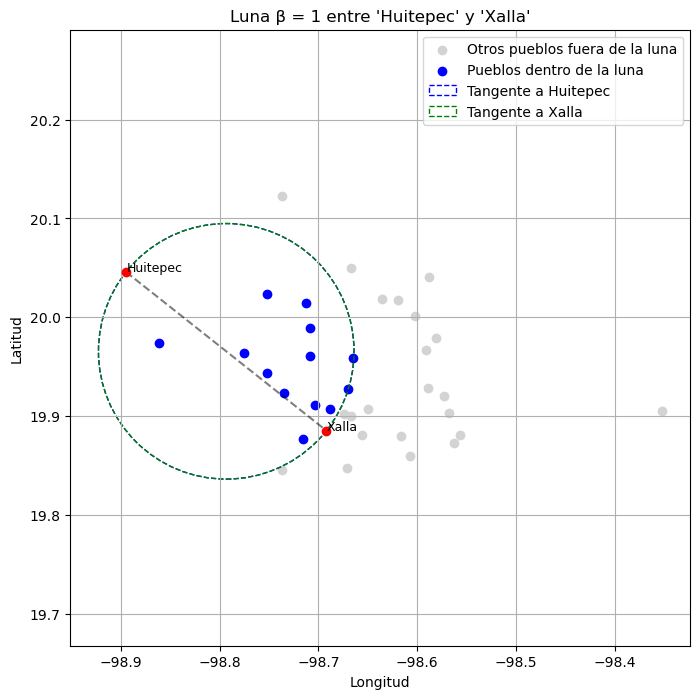

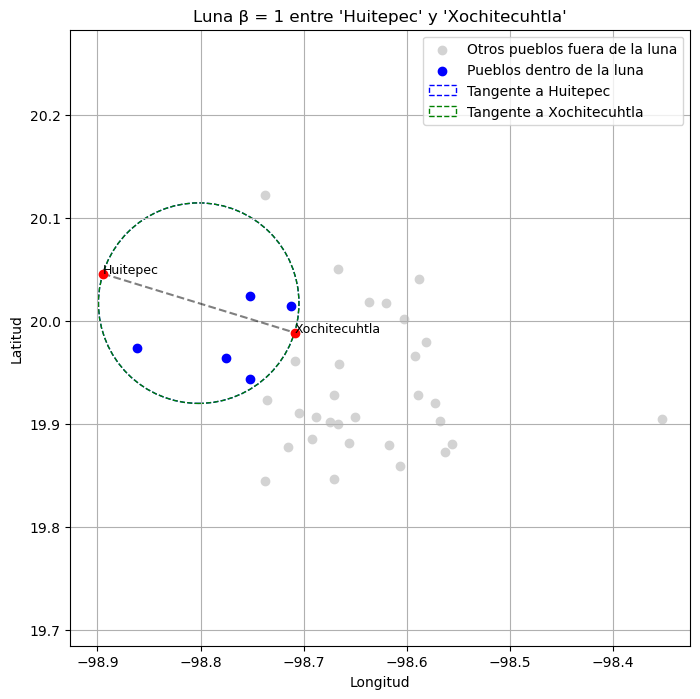

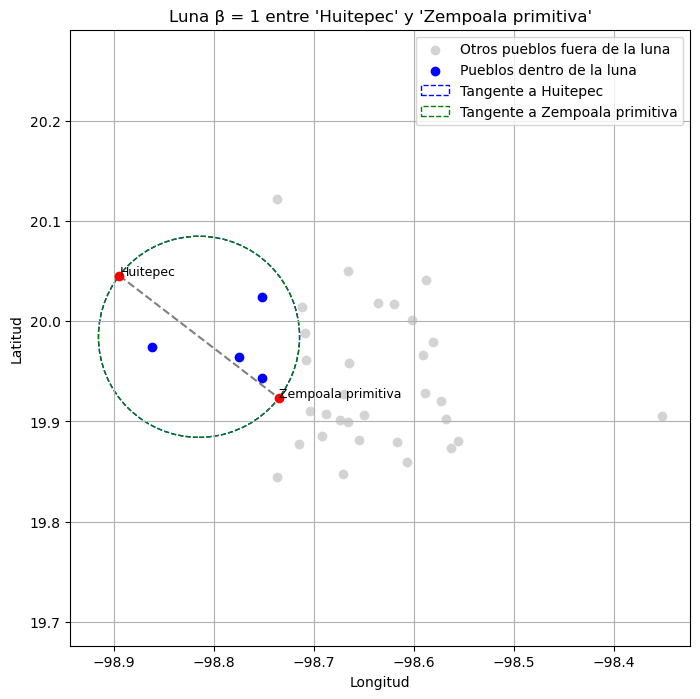

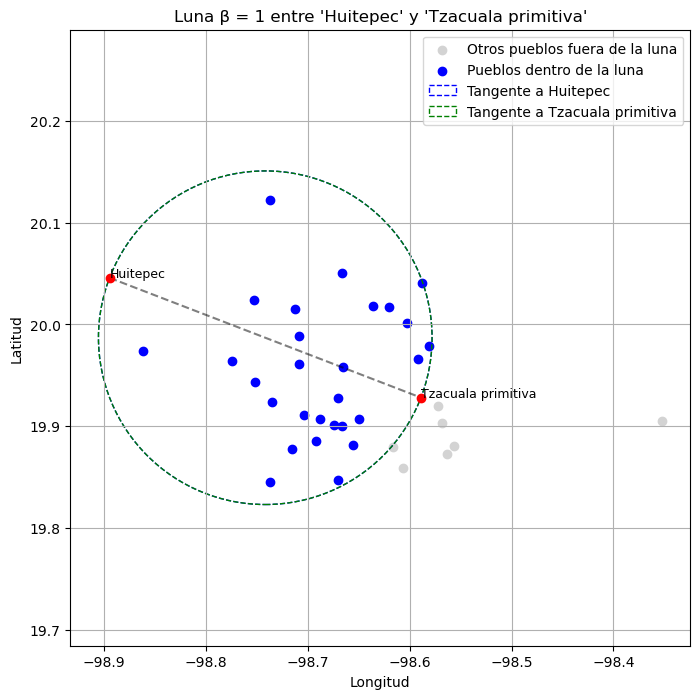

In [12]:
plot_beta_lunes_for_node(coords, names, i=6, beta=1)

In [13]:
import numpy as np

def check_lune_for_node(coords, i, beta=1.0):
    n = len(coords)
    p1 = coords[i]
    result_vector = []

    for j in range(n):
        if j == i:
            result_vector.append(0)  # No self-loop; optional choice
            continue

        p2 = coords[j]
        d = np.linalg.norm(p2 - p1)
        if d == 0:
            result_vector.append(0)
            continue

        r = (beta * d) / 2
        direction = (p2 - p1) / d
        center1 = p1 + direction * r
        center2 = p2 - direction * r

        # Check if any other point lies in the lune (intersection of both circles)
        is_clear = 1
        for k in range(n):
            if k == i or k == j:
                continue
            pk = coords[k]
            dist1 = np.linalg.norm(pk - center1)
            dist2 = np.linalg.norm(pk - center2)
            if dist1 < r and dist2 < r:
                is_clear = 0  # Found a point in the lune
                break

        result_vector.append(is_clear)

    return result_vector


In [14]:
result = check_lune_for_node(coords, i=6, beta=1)
print(result)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


### Beta skeleton matrix

In [15]:
def beta_skeleton_adjacency_matrix(coords, beta=1.0):
    n = len(coords)
    matrix = np.zeros((n, n), dtype=int)

    for i in range(n):
        row = check_lune_for_node(coords, i, beta=beta)
        matrix[i] = row

    # Make sure the matrix is symmetric (undirected graph)
    matrix = np.minimum(matrix, matrix.T)
    
    return matrix


In [16]:
adj_matrix = beta_skeleton_adjacency_matrix(coords, beta=1)
print(adj_matrix)


[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## STEP 3: Build and visualize the graph

### Beta =1 (Gabriel Graph)

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_beta_skeleton_graph(coords, names, beta=1.0):
    # Get the adjacency matrix using the beta-skeleton rule
    adj_matrix = beta_skeleton_adjacency_matrix(coords, beta=beta)
    
    # Create graph
    G = nx.Graph()
    
    # Add nodes with positions and labels
    for i, (x, y) in enumerate(coords):
        G.add_node(i, pos=(x, y), label=names[i])
    
    # Add edges where the adjacency matrix has 1
    n = len(coords)
    for i in range(n):
        for j in range(i + 1, n):
            if adj_matrix[i, j] == 1:
                G.add_edge(i, j)

    # Plot
    pos = nx.get_node_attributes(G, 'pos')
    labels = nx.get_node_attributes(G, 'label')

    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, node_color='skyblue', with_labels=False, node_size=100)
    
    # Add custom text labels
    for i, (x, y) in pos.items():
        plt.text(x + 0.0003, y + 0.0003, labels[i], fontsize=8)

    plt.title(f"Gráfica β-esqueleto (β = {beta})")
    plt.grid(True)
    plt.axis("equal")
    plt.show()


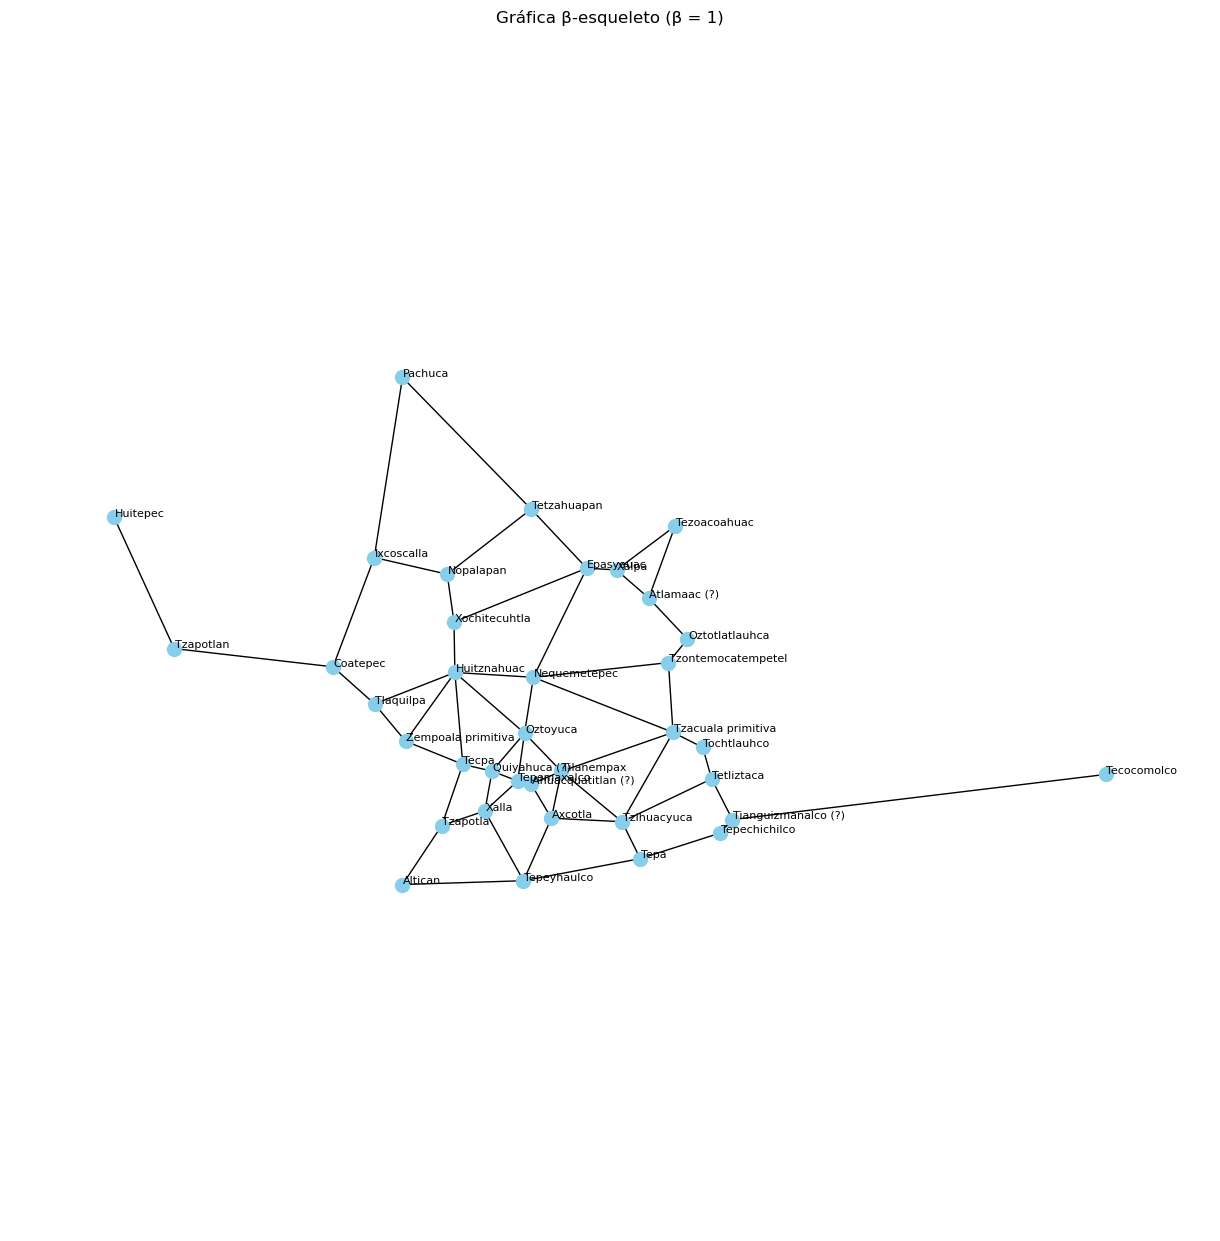

In [18]:
plot_beta_skeleton_graph(coords, names, beta=1)

### Beta = 1.5 

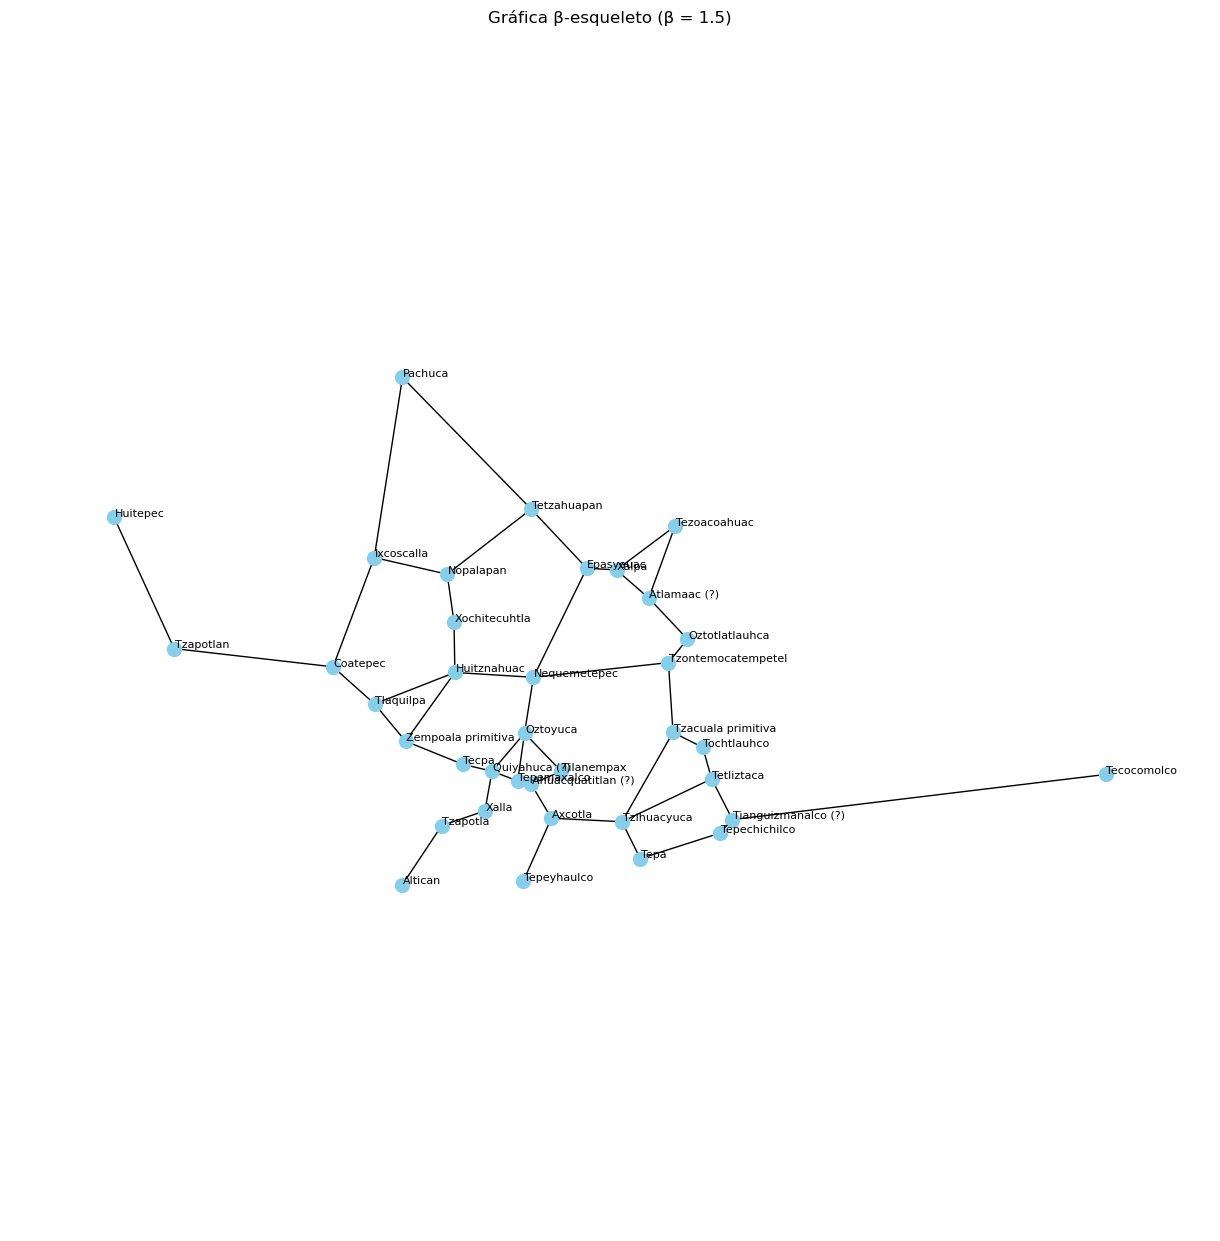

In [19]:
plot_beta_skeleton_graph(coords, names, beta=1.5)

### Beta = 2 (Relative Neighborhood Graph)

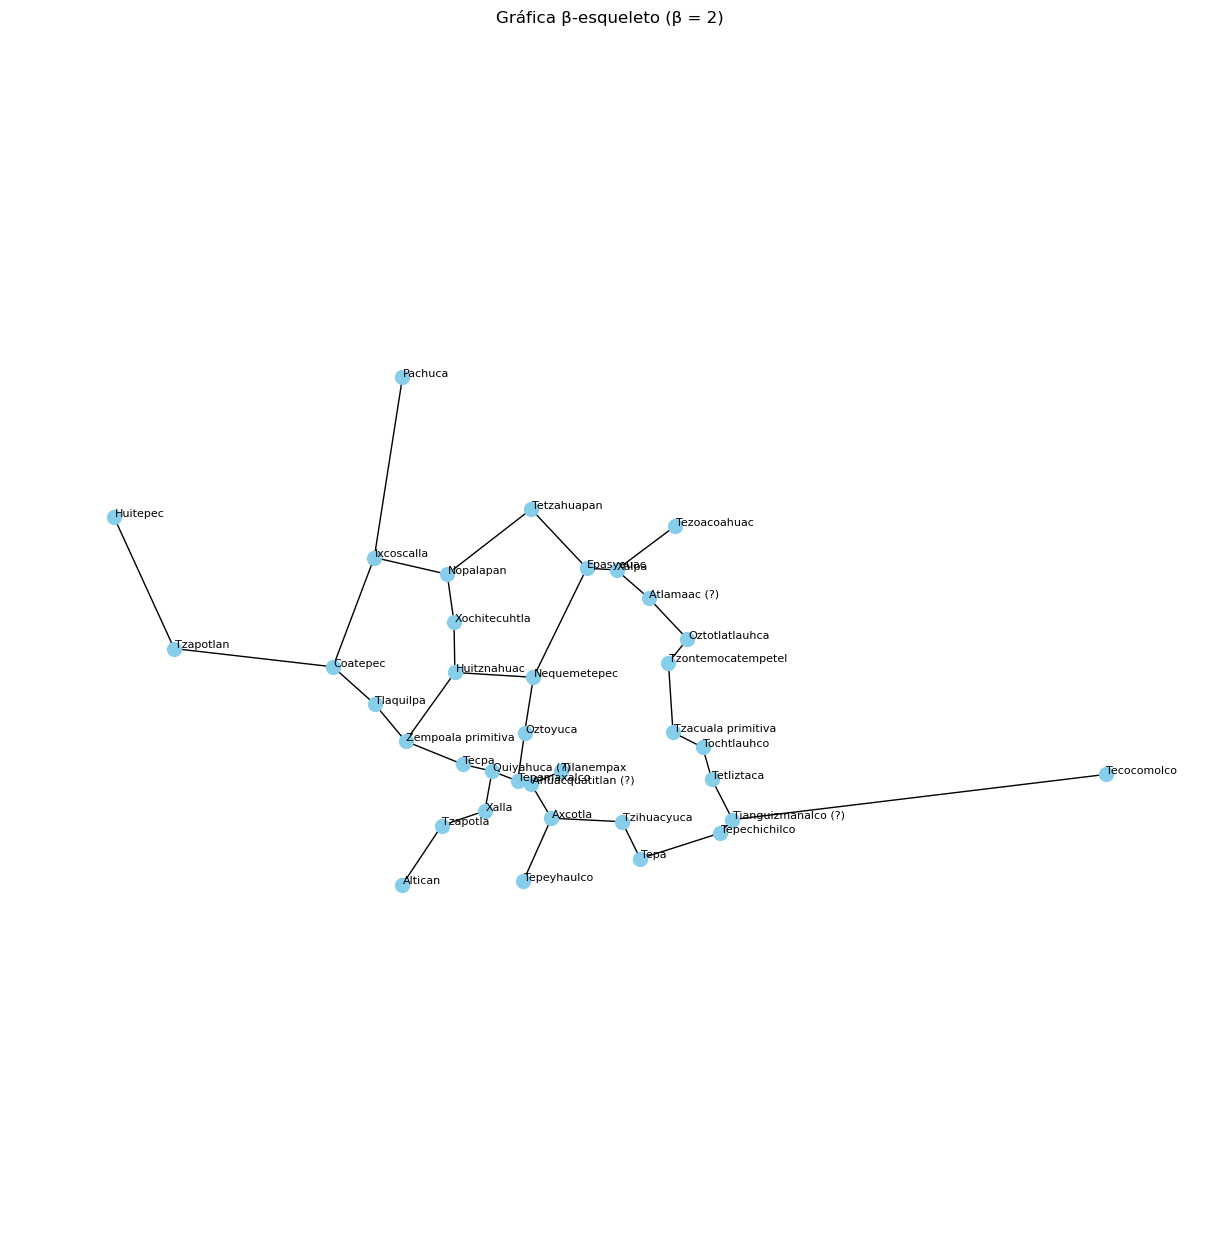

In [20]:
plot_beta_skeleton_graph(coords, names, beta=2)

### Beta = 5

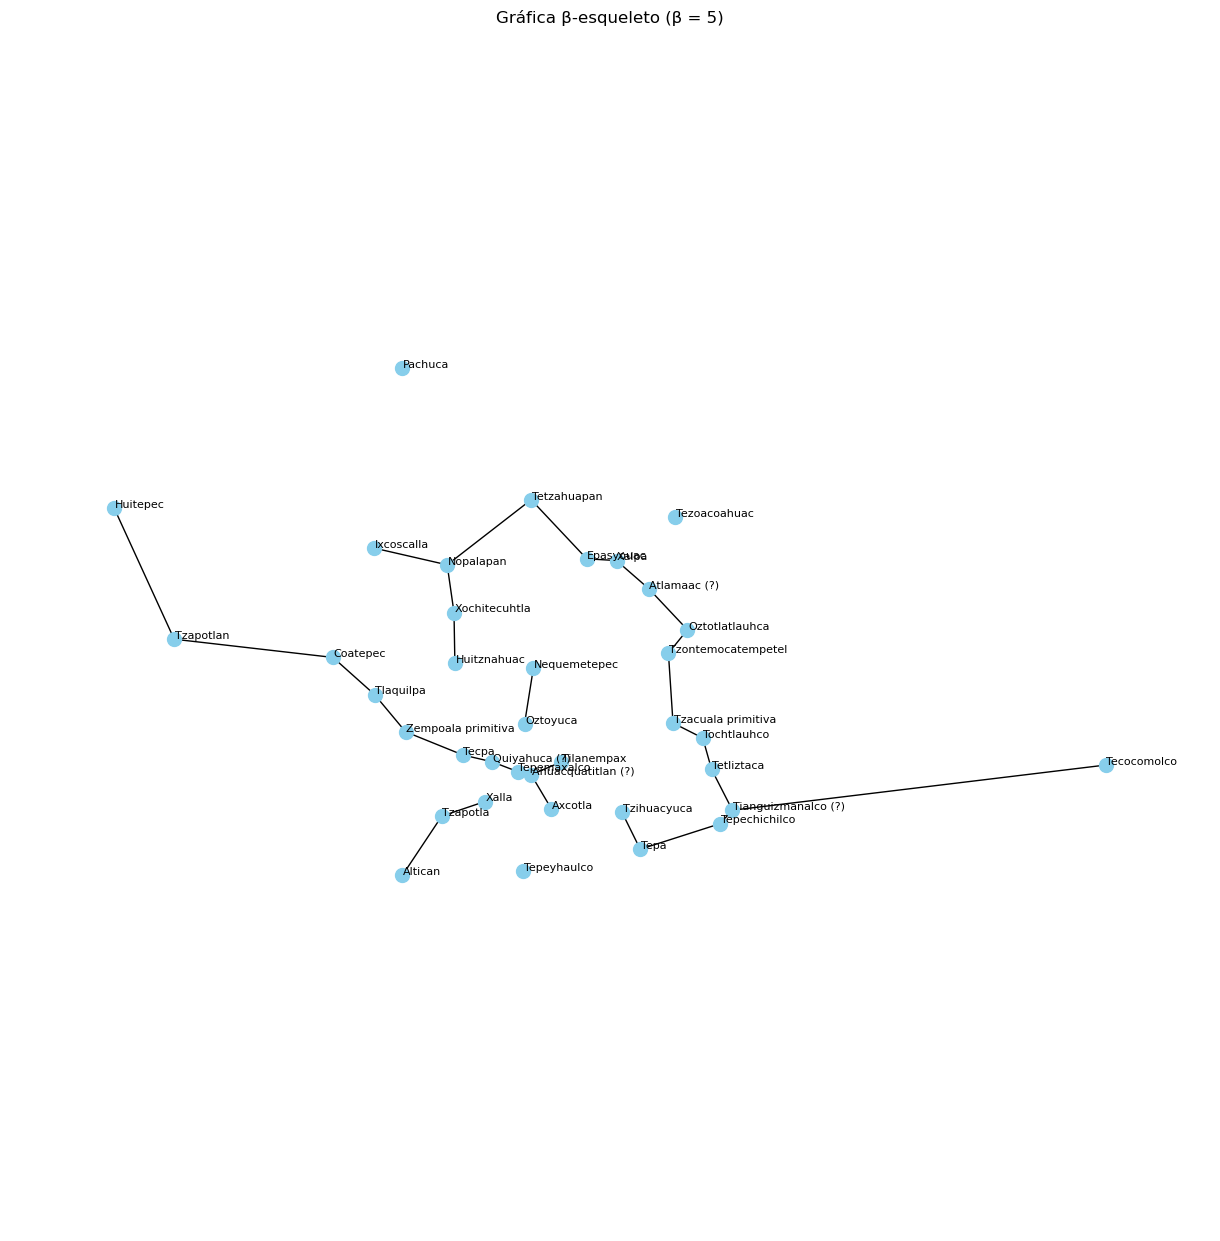

In [21]:
plot_beta_skeleton_graph(coords, names, beta=5)

### Beta = 20

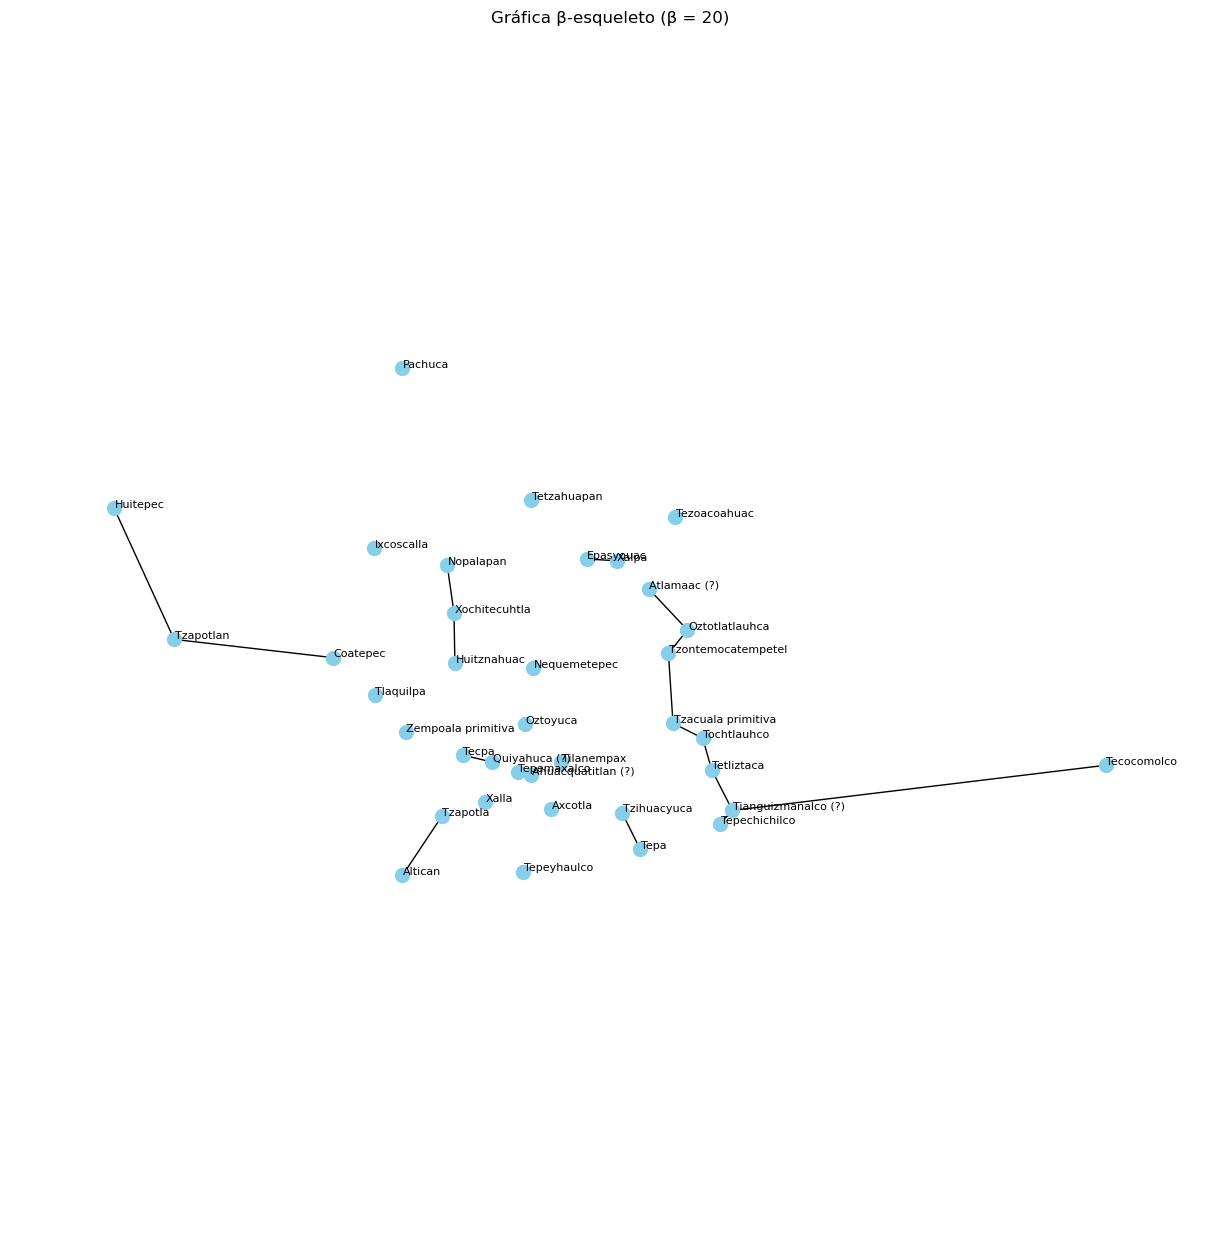

In [22]:
plot_beta_skeleton_graph(coords, names, beta=20)

### Beta 30

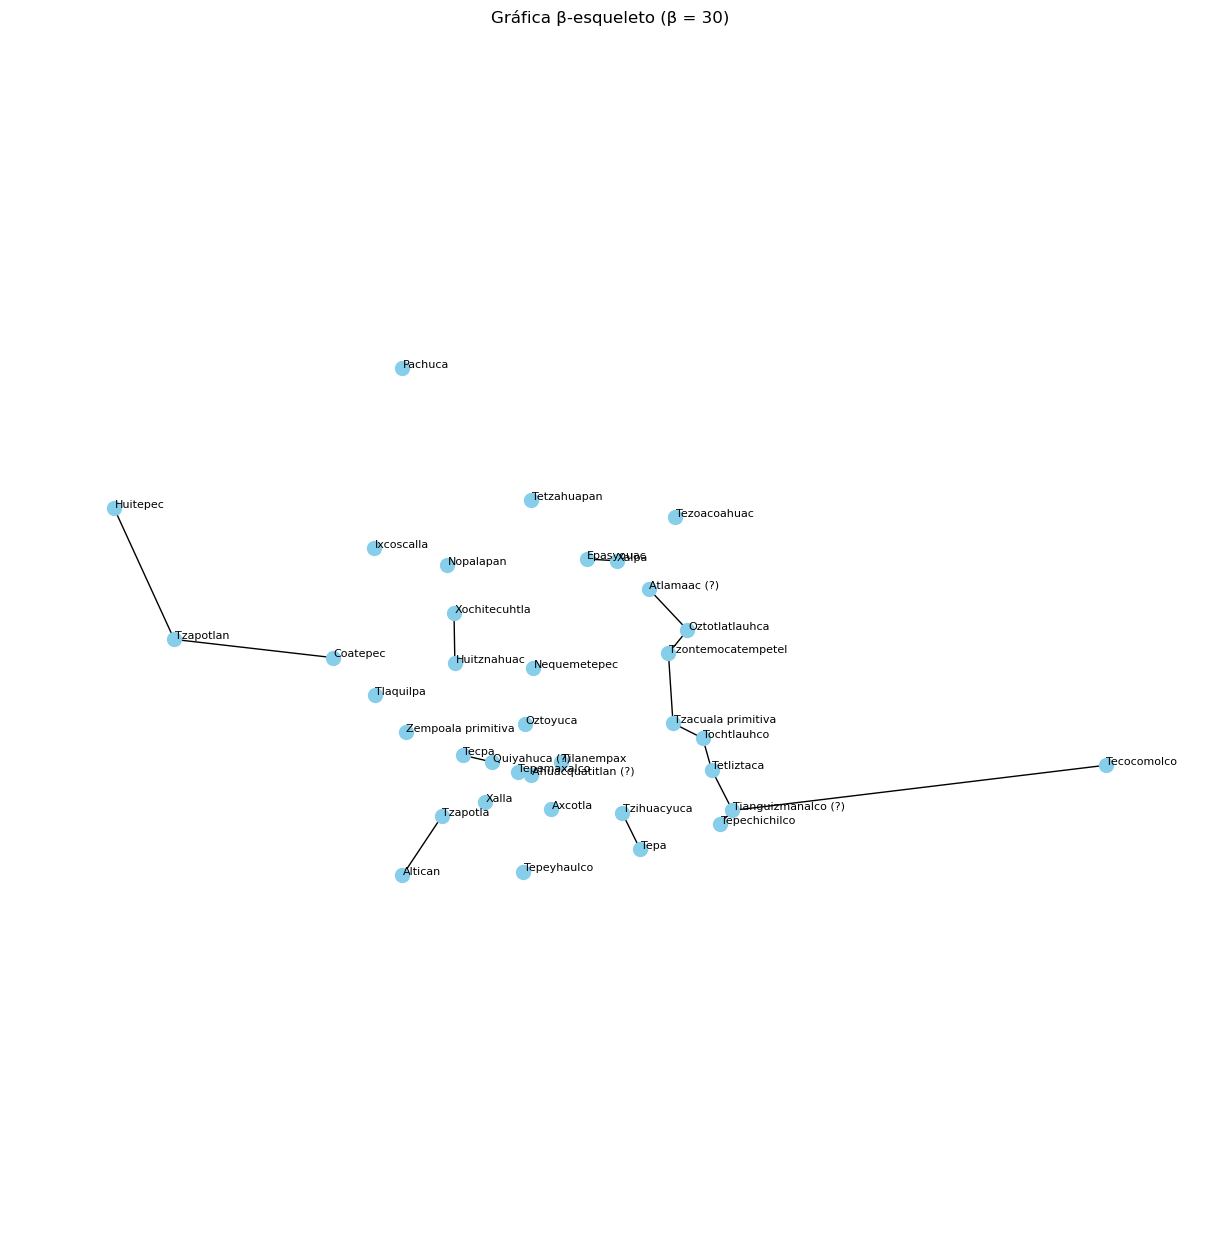

In [23]:
plot_beta_skeleton_graph(coords, names, beta=30)